In [1]:
from ml import MLStrategy, ml_benchmark
import matplotlib.pyplot as plt
import quantstats as qs
import numpy as np
from utils import load_financial_data
import pandas as pd

In [2]:
ticker="NVDA"

In [3]:
perf = ml_benchmark(
    ticker=ticker,
    train_start_date='2013-01-01',
    train_end_date='2022-12-31',
    valid_start_date='2022-01-01',
    valid_end_date='2022-12-31',
    test_start_date='2023-01-01',
    test_end_date='2023-12-31',
    lookback=14,
    forward=7,
    initial_cash=1e3,
    num_share_per_trade=1,
)

File data found...reading NVDA data
File data found...reading NVDA data
File data found...reading NVDA data


100%|██████████| 237/237 [00:00<00:00, 1373.43it/s]


In [4]:
perf

,price,daily_return,signals,cash,positions,wealth
Date,,,,,,
2023-01-03,143.079788,1.000000,0,1000.000000,0.000000,1000.000000
2023-01-04,147.417694,0.030318,0,1000.000000,0.000000,1000.000000
2023-01-05,142.580032,-0.032816,0,1000.000000,0.000000,1000.000000
2023-01-06,148.517120,0.041640,0,1000.000000,0.000000,1000.000000
2023-01-09,156.203369,0.051753,0,1000.000000,0.000000,1000.000000
...,...,...,...,...,...,...
2023-12-22,488.277069,-0.003266,0,356.137863,1953.108276,2309.246140
2023-12-26,492.766907,0.009195,0,356.137863,1971.067627,2327.205490
2023-12-27,494.146820,0.002800,0,356.137863,1976.587280,2332.725143


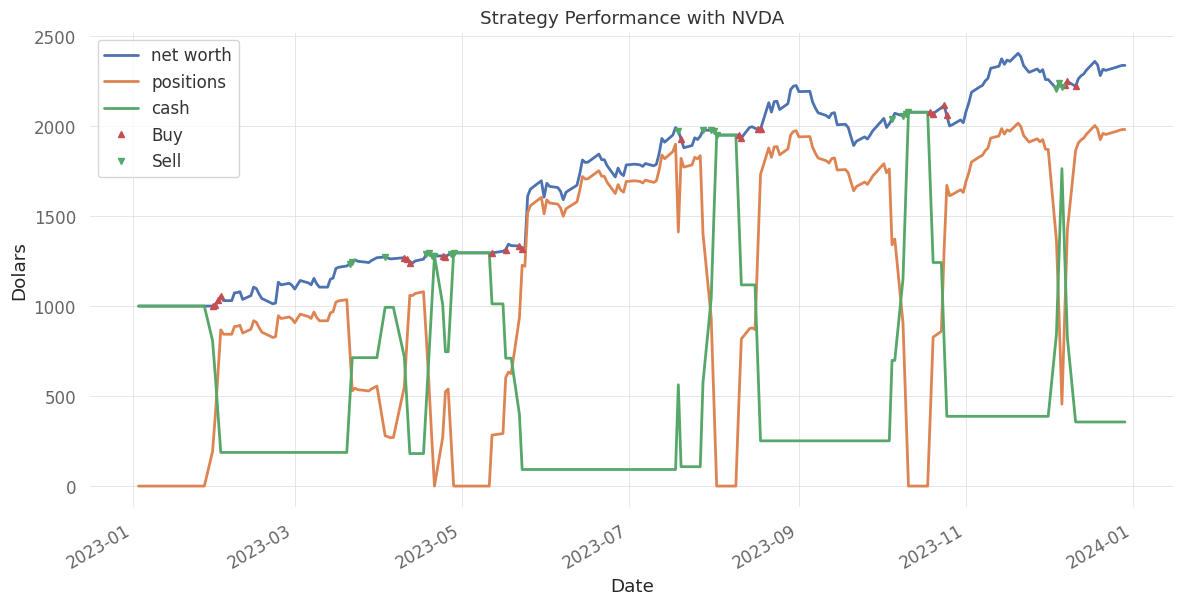

In [5]:
price = perf.price
buy_and_hold = price

fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(111, ylabel = 'Price in USD')
perf.wealth.plot(ax=ax1, lw=2., label="net worth")
perf.positions.plot(ax=ax1, lw=2., label="positions")
perf.cash.plot(ax=ax1, lw=2., label="cash")

ax1.plot(perf.loc[perf.signals == 1.0].index, perf.wealth[perf.signals == 1.0], '^', markersize=5, color='r', label="Buy")
ax1.plot(perf.loc[perf.signals == -1.0].index, perf.wealth[perf.signals == -1.0], 'v', markersize=5, color='g', label="Sell")

plt.xlabel("Date")
plt.ylabel("Dolars")
plt.title(f"Strategy Performance with {ticker}")
plt.legend()
plt.show()

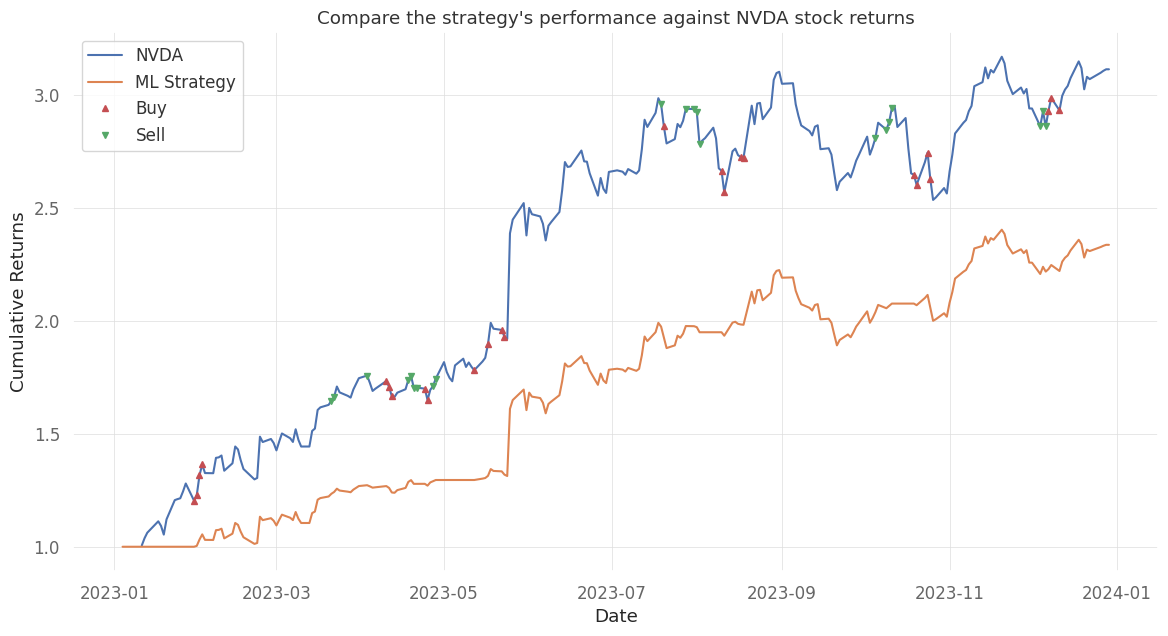

In [13]:
price = (1 + price.pct_change()).cumprod()
wealth = (1 + perf.wealth.pct_change()).cumprod()

# Plot both cumulative returns on the same chart 
plt.figure(figsize=(14, 7)) 
plt.plot(price.index, price, label=ticker) 
plt.plot(perf.index, wealth, label='ML Strategy')

plt.plot(perf.loc[perf.signals == 1.0].index, price[perf.signals == 1.0], '^', markersize=5, color='r', label="Buy")
plt.plot(perf.loc[perf.signals == -1.0].index, price[perf.signals == -1.0], 'v', markersize=5, color='g', label="Sell")

plt.title(f"Compare the strategy's performance against {ticker} stock returns")
plt.xlabel('Date') 
plt.ylabel('Cumulative Returns') 
plt.legend() 
plt.savefig(f"./results-vis/compare/{ticker}.png")
plt.show()

In [7]:
returns = perf.wealth.pct_change(periods=21)
print(f"Monthly Expected Return: {returns.mean():.3f}")
print(f"Monthly Volatility: {returns.std():.3f}")
print(f"Sharpe ratio: {returns.mean() / returns.std():.3f}")

Monthly Expected Return: 0.082
Monthly Volatility: 0.094
Sharpe ratio: 0.874


In [8]:
returns = perf.price.pct_change(periods=21)
print(f"Monthly Expected Return: {returns.mean():.3f}")
print(f"Monthly Volatility: {returns.std():.3f}")
print(f"Sharpe ratio: {returns.mean() / returns.std():.3f}")

Monthly Expected Return: 0.106
Monthly Volatility: 0.141
Sharpe ratio: 0.755
